In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

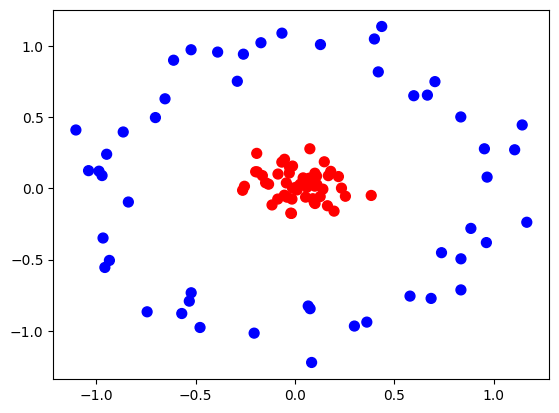

In [406]:
from sklearn.datasets import make_circles
# x = coordinate of a datapoint 
#y = label (color
X, y = make_circles(100, factor=.1, noise=.1)  

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

 # support vector classifier kernel = "linear"

In [437]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

 #support vector classifier kerner = "linear"
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6


# plotting the decision boundary

In [435]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()


C:\Users\abhi2\AppData\Local\Temp\ipykernel_12088\2064171096.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


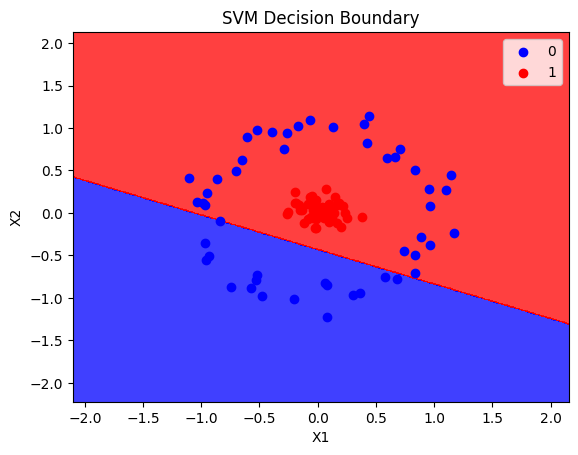

In [439]:
plot_decision_boundary(X, y, classifier)

# converting the above from 2d into 3d

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

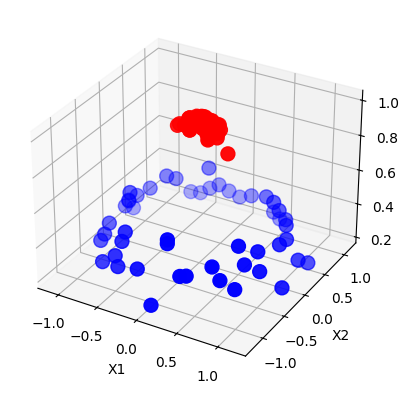

In [419]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax
plot_3d_plot(X,y)

# SVC using kernel = "RBF"  radial basis function

In [294]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [296]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\abhi2\AppData\Local\Temp\ipykernel_12088\1206711130.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


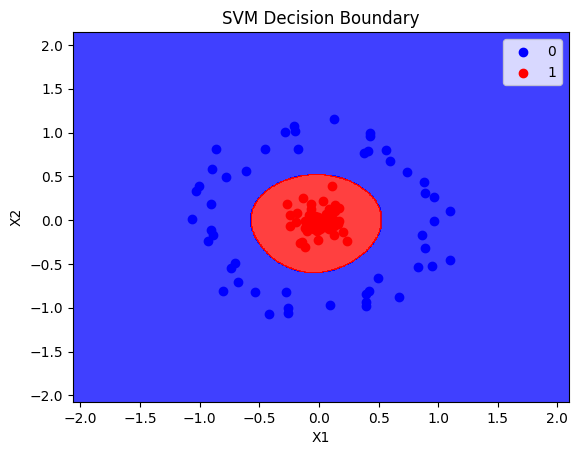

In [298]:
plot_decision_boundary(X, y, rbf_classifier)

# SVC using kernel = "polynomial" with different degrees

In [441]:
poly_classifier = SVC(kernel="poly",degree=3)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [443]:
accuracy_score(y_test, y_pred)

0.55

C:\Users\abhi2\AppData\Local\Temp\ipykernel_12088\2064171096.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


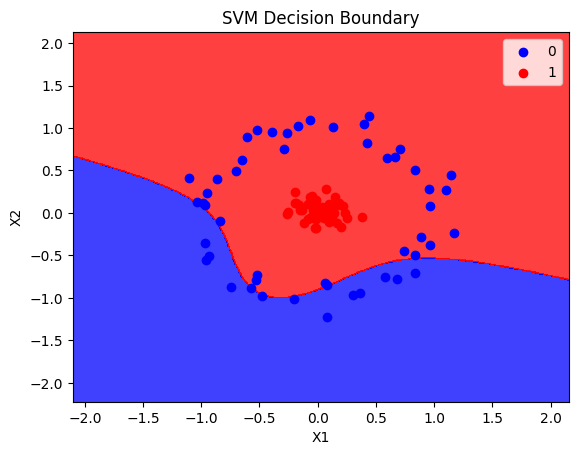

In [445]:
plot_decision_boundary(X, y, poly_classifier)

In [306]:
X

array([[ 0.39760569, -0.93664414],
       [-0.86336242,  0.80725227],
       [ 0.88674788, -0.32107144],
       [ 0.8769295 ,  0.43264761],
       [-0.61228658,  0.56134158],
       [-0.11452616, -0.0118168 ],
       [-0.07031658, -0.08988553],
       [-1.0038061 ,  0.3893737 ],
       [-0.24628021,  0.05988138],
       [-0.67735323, -0.7041583 ],
       [-0.05154562, -0.04321097],
       [-0.04157542, -0.10053309],
       [ 0.4242425 ,  0.98999145],
       [ 0.1303282 ,  1.1509608 ],
       [-0.25575713, -1.05680642],
       [-0.00524546,  0.04100733],
       [-0.80589605, -0.81251254],
       [-0.28622121,  1.00604824],
       [-1.02732113,  0.33262508],
       [ 1.09764202, -0.45430154],
       [ 0.12508287,  0.13113595],
       [-0.11316042, -0.30879024],
       [-0.06419294,  0.12440762],
       [-0.07550619, -0.01202126],
       [ 0.39188762, -0.84052702],
       [ 0.40736198,  0.7895769 ],
       [-0.27146979,  0.18365492],
       [ 0.96124723, -0.01095123],
       [-0.10088242,

In [307]:
np.exp(-(X**2)).sum(1)

array([1.2696761 , 0.99572884, 1.35756581, 1.292765  , 1.41707426,
       1.98682977, 1.98702092, 1.22440615, 1.93756952, 1.24109671,
       1.99548113, 1.98821698, 1.21056542, 1.24903785, 1.26399427,
       1.9982923 , 1.0390834 , 1.28478619, 1.24331859, 1.11326238,
       1.96742641, 1.89632979, 1.98052965, 1.99417054, 1.3510107 ,
       1.3831954 , 1.89578755, 1.39680972, 1.97353699, 1.97288635,
       1.95788998, 1.99600025, 1.43748186, 1.97310418, 1.94857474,
       1.99602233, 1.9964502 , 1.99191762, 1.09533919, 1.99080981,
       1.95994299, 1.23821628, 1.99186291, 1.92033923, 1.29914268,
       1.96160185, 1.33982248, 1.98929169, 1.98565555, 1.99431851,
       1.35320444, 1.98711808, 1.31708518, 1.15666611, 1.95138853,
       1.99945691, 1.8495152 , 1.9899442 , 1.36127231, 1.39577154,
       1.42703117, 1.98393864, 1.95444237, 1.97714911, 1.94083468,
       1.91137152, 1.41839364, 1.48681402, 1.97565464, 1.25411188,
       1.22747394, 1.40211963, 1.16271958, 1.38304653, 1.33267

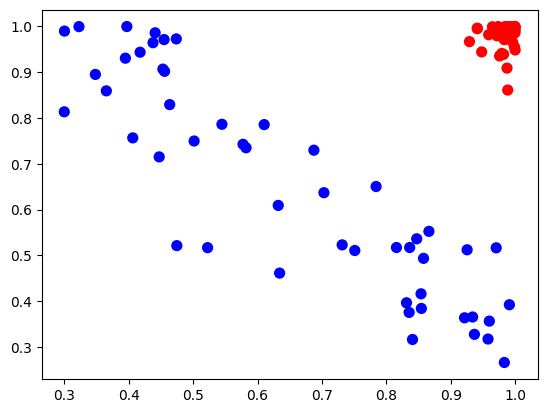

In [308]:
X_new=np.exp(-(X**2))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')